# Polynomial Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
data = pd.read_csv('Position_Salaries.csv')
X = data.iloc[:,1:2].values  #[:,1] this didn't work
y = data.iloc[:,-1].values
#print(X,y)
#no need to use model selection to test train and split due to nature of data

## Training the Linear Regression model on the whole dataset

In [ ]:
#trying linear reg because we have only one dependent variable
from sklearn.linear_model import LinearRegression
#lr = linear regression
lr = LinearRegression()
lr.fit(X,y)
#fitted. now let's fit the polynomial one

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [ ]:
#we will build the polynomial linear regression from the multiple linear regression
#the difference is that, x1,x2,x3 etc of the mlr will be x1^2, x2^2, x3^3

#1. We first need to create a matrix of power(squared) features [b1x1,b2x2^2,b3x3^2]
#import the tool for creating power features[polynomial features]
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2) #creating an instance for a power of 2 ie n=2
X_poly = poly_reg.fit_transform(X)


#2. Then we create a LinearRegressor object to integrate the power features of these bound features of this matrix (ie Linear Integration)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

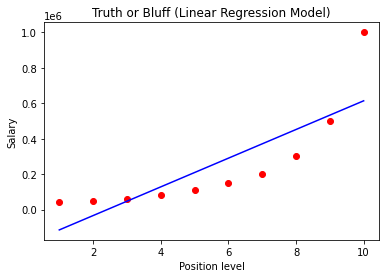

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lr.predict(X), c = 'blue')#plotting the regression line
plt.title('Truth or Bluff (Linear Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

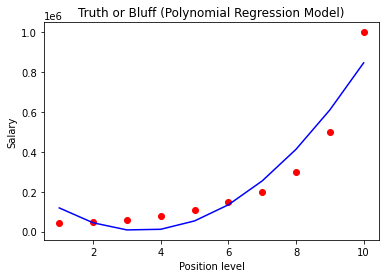

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X_poly), c = 'blue')#plotting the regression line
plt.title('Truth or Bluff (Polynomial Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
#trying for order of 3
poly_reg2 = PolynomialFeatures(degree = 3)
X_poly2 = poly_reg2.fit_transform(X)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

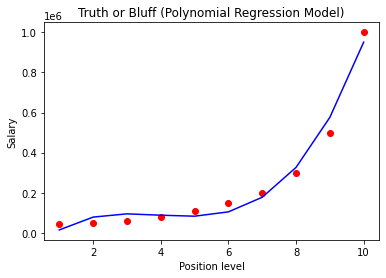

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg2.predict(X_poly2), c = 'blue')#plotting the regression line
plt.title('Truth or Bluff (Polynomial Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
#try it with an order of 4 ie It kind of overfits here

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

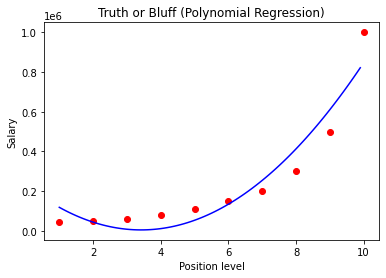

In [ ]:
#changed to lin_reg and poly_reg

#not very important though

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

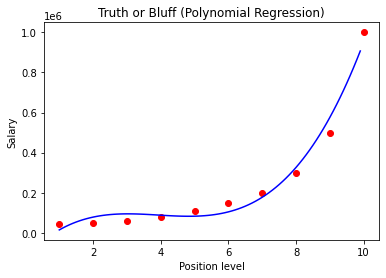

In [ ]:
#to use the 3rd order [lin_reg2.predict(X_poly2)]
#changed to lin_reg2 and ply_reg2
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg2.predict(poly_reg2.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [ ]:
y_predict = lr.predict([[6.5]])
#array uses double square, interpretation ([row[column]])
#try this ([[6.5, 5]]) No Answer
#list/vector uses a pair of square brackets
y_predict

array([330378.78787879])

In [ ]:
#lr.predict([[6.5, 5],[2,3]]) #No Answer

In [ ]:
#others
lr.coef_, lr.intercept_

(array([80878.78787879]), -195333.33333333337)

## Predicting a new result with Polynomial Regression

In [ ]:
lin_reg.predict(poly_reg.fit_transform([[6.5]]))#enter features of the equation

array([189498.10606061])

In [ ]:
lin_reg2.predict(poly_reg2.fit_transform([[6.5]])) #using fit_transform to manipulate the x input into that of those transformed already

array([133259.46969697])

In [ ]:
#others
lin_reg2.coef_, lin_reg2.fit_intercept #intercepts of b0 to b3

(array([     0.        , 180664.33566432, -48548.95104895,   4120.04662005]),
 True)